In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("E:\\github\\my upload\\Credit Card Fraud Detection\\creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Text(0, 0.5, 'Frequency')

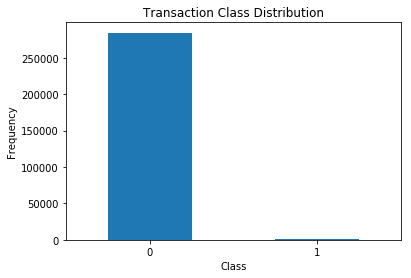

In [5]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")


plt.xlabel("Class")

plt.ylabel("Frequency")

In [6]:
data_majority = data[data.Class==0]
data_minority = data[data.Class==1]

In [7]:
data_majority.count()

Time      284315
V1        284315
V2        284315
V3        284315
V4        284315
V5        284315
V6        284315
V7        284315
V8        284315
V9        284315
V10       284315
V11       284315
V12       284315
V13       284315
V14       284315
V15       284315
V16       284315
V17       284315
V18       284315
V19       284315
V20       284315
V21       284315
V22       284315
V23       284315
V24       284315
V25       284315
V26       284315
V27       284315
V28       284315
Amount    284315
Class     284315
dtype: int64

In [8]:
data_minority.count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [9]:
from sklearn.utils import resample
data_minority_upsampled = resample(data_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=284315,    # to match majority class
                                    random_state=123)

In [10]:
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [11]:
data_upsampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [12]:
data_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 0 to 43428
Data columns (total 31 columns):
Time      568630 non-null float64
V1        568630 non-null float64
V2        568630 non-null float64
V3        568630 non-null float64
V4        568630 non-null float64
V5        568630 non-null float64
V6        568630 non-null float64
V7        568630 non-null float64
V8        568630 non-null float64
V9        568630 non-null float64
V10       568630 non-null float64
V11       568630 non-null float64
V12       568630 non-null float64
V13       568630 non-null float64
V14       568630 non-null float64
V15       568630 non-null float64
V16       568630 non-null float64
V17       568630 non-null float64
V18       568630 non-null float64
V19       568630 non-null float64
V20       568630 non-null float64
V21       568630 non-null float64
V22       568630 non-null float64
V23       568630 non-null float64
V24       568630 non-null float64
V25       568630 non-null float64
V26   

In [13]:
data_upsampled.isnull().values.any()

False

In [14]:
x_sc=data_upsampled.drop(['Time','Class'],axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(x_sc)

In [16]:
y=data_upsampled.Class

In [17]:
X.shape

(568630, 29)

In [18]:
y.shape

(568630,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

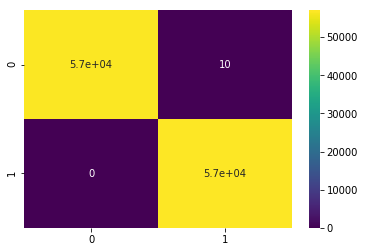

In [24]:
sns.heatmap(cm,annot=True,cmap='viridis')

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9999120693596891

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56713
           1       1.00      1.00      1.00     57013

   micro avg       1.00      1.00      1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

